# Extraction of stimulus delay data.
In this notebook you will be able to find the delay of audio and video. The two delays will be shown on different figures as histograms.

In [1]:
%matplotlib inline

In [2]:
from stormdb.access import Query
from os.path import join
from meeg.extract_delays_MEG import extract_delays

### File layout
For the cell below 
* Set `vis_trig_code` to the correct visual trigger code
* Set `aud_trig_code` to the correct auditory trigger code
* Set `vis_misc_channel` to the correct visual misc channel
* Set `aud_misc_channel` to the correct auditory misc channel
* Set `proj_name` to the correct project name

In [28]:
vis_trig_code = 2
aud_trig_code = 1
vis_misc_channel='MISC001'
aud_misc_channel='MISC002'
proj_name = 'MEG_service'

In [29]:
qy = Query(proj_name)
plot_figures = True

### Commands for retrieving raw data
* We'll retrieve the raw data from the StormDB
    * To find the right series/raw data, you can:
        1. Log in to StormDB
        2. Click on the project
        3. Click on the subject
        4. Click on the study
        5. Find the right series
* The `filter_series` method lets you search for parts of the path/file name.
    * The files that is in this path, will then be put into the `filelist`
* By writing `filelist` you can see every file/item in it.
    * If your desired file is in the first slot of the list, you can continue to `extract_delays`
        * Else you will have edit the `raw_fname` so you access the right file`

In [20]:
filelist = qy.filter_series('aud_vis_LPT_presentation*')
raw_fname = join(filelist[0]['path'], filelist[0]['files'][0])

In [21]:
filelist

[{u'age': u'10',
  u'files': [u'PROJ38_SUBJ0032_SER002_FILESNO1.fif'],
  u'height': u'',
  u'modality': u'MEG',
  u'path': u'/projects/MEG_service/raw/0032/20160823_000000/MEG/002.aud_vis_LPT_presentation/files',
  u'qscore': u'0',
  u'serieDbId': u'195455',
  'seriename': u'aud_vis_LPT_presentation',
  u'serieno': u'2',
  u'study': u'20160823_000000',
  u'subject': u'32',
  u'subjectcode': u'0032_VX5',
  u'type': u'',
  u'weight': u''}]

In [22]:
vis_trig_code

2

### Visual stimuli

Opening raw data file /raw/sorted/MEG_service/0032/20160823_000000/MEG/002.aud_vis_LPT_presentation/files/PROJ38_SUBJ0032_SER002_FILESNO1.fif...
This filename (/raw/sorted/MEG_service/0032/20160823_000000/MEG/002.aud_vis_LPT_presentation/files/PROJ38_SUBJ0032_SER002_FILESNO1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Read a total of 8 projection items:
        mag_68.fif : PCA-v1 (1 x 306)  idle
        mag_68.fif : PCA-v2 (1 x 306)  idle
        mag_68.fif : PCA-v3 (1 x 306)  idle
        mag_68.fif : PCA-v4 (1 x 306)  idle
        mag_68.fif : PCA-v5 (1 x 306)  idle
        grad_68.fif : PCA-v1 (1 x 306)  idle
        grad_68.fif : PCA-v2 (1 x 306)  idle
        grad_68.fif : PCA-v3 (1 x 306)  idle
    Range : 367000 ... 1119999 =     73.400 ...   224.000 secs
Ready.
Reading 0 ... 752999  =      0.000 ...   150.600 secs...
293 events found
Events

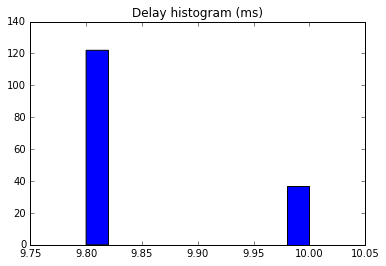

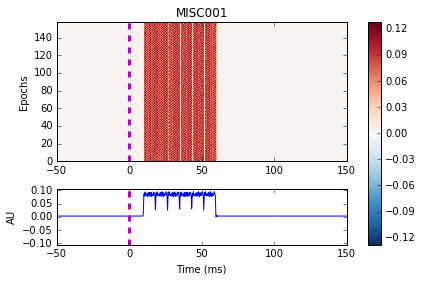

Median delay: 9.8 ms (range: 9.8 - 10.0 ms)


In [30]:
vis_delays, vis_stats = extract_delays(raw_fname, trig_codes=vis_trig_code, misc_chan=vis_misc_channel,
                                       plot_figures=plot_figures,
                                       crop_plot_time=(-0.050, 0.150))
print('Median delay: {:.1f} ms (range: {:.1f} - {:.1f} ms)'.format(vis_stats['median'],
                                                                   vis_delays.min(),
                                                                   vis_delays.max()))

### Auditory stimuli

Opening raw data file /raw/sorted/MEG_service/0032/20160823_000000/MEG/002.aud_vis_LPT_presentation/files/PROJ38_SUBJ0032_SER002_FILESNO1.fif...
This filename (/raw/sorted/MEG_service/0032/20160823_000000/MEG/002.aud_vis_LPT_presentation/files/PROJ38_SUBJ0032_SER002_FILESNO1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Read a total of 8 projection items:
        mag_68.fif : PCA-v1 (1 x 306)  idle
        mag_68.fif : PCA-v2 (1 x 306)  idle
        mag_68.fif : PCA-v3 (1 x 306)  idle
        mag_68.fif : PCA-v4 (1 x 306)  idle
        mag_68.fif : PCA-v5 (1 x 306)  idle
        grad_68.fif : PCA-v1 (1 x 306)  idle
        grad_68.fif : PCA-v2 (1 x 306)  idle
        grad_68.fif : PCA-v3 (1 x 306)  idle
    Range : 367000 ... 1119999 =     73.400 ...   224.000 secs
Ready.
Reading 0 ... 752999  =      0.000 ...   150.600 secs...
293 events found
Events

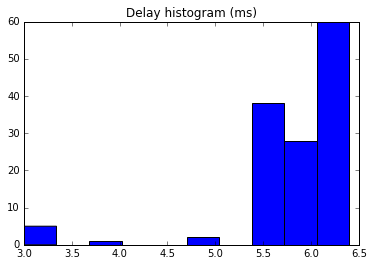

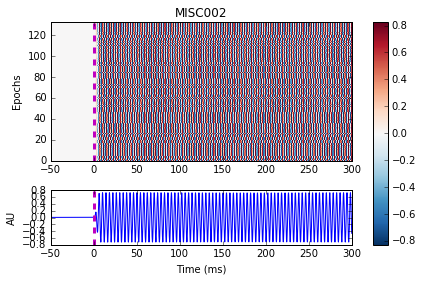

Median delay: 6.0 ms (range: 3.0 - 6.4 ms)


In [31]:
aud_delays, aud_stats = extract_delays(raw_fname, trig_codes=aud_trig_code, misc_chan=aud_misc_channel,
                                       plot_figures=plot_figures,
                                       crop_plot_time=(-0.050, 0.300))
print('Median delay: {:.1f} ms (range: {:.1f} - {:.1f} ms)'.format(aud_stats['median'],
                                                                   aud_delays.min(),
                                                                   aud_delays.max()))

### Commands for checking data and statistic values
* By calling `delays` you will be able to see a list of each delay
* `stats.keys()` will let you see every possible command for statistic values
    * F.ex `stats['median']`

In [19]:
for key in aud_stats:
    print('{0}: {1}'.format(key, aud_stats[key]))

std: 3.06277382386
median: 28.2
q90: 30.2
q10: 27.8
max_amp: 0.827331542969
min_amp: -0.820617675781
mean: 28.2640625
